# Going through data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_json('./data/bycountry_ds.json')
df.shape

(17403, 5)

In [4]:
df.head()

,category,input,output_low,output_medium,output_high
http://dbpedia.org/resource/...All_the_Marbles,[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/An_Eye_for_an_Eye_(1981_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/Brain_Dead_(1990_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/For_Pete's_Sake_(film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/Hannah_Montana:_The_Movie,[United States],"[25, 6677, 48, 2, 138, 5, 331, 1, 7, 25, 6983,...",0,0,1


In [5]:
from tensorflow import keras

In [6]:
model = keras.models.load_model('./models/bycountry_model')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 652,515
Trainable params: 652,515
Non-trainable params: 0
_________________________________________________________________


In [8]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)
    if i != 0: # Embedding does not have activation function
        print(layer.activation)

0 embedding
1 lstm_3
<function tanh at 0x0000028D504B3DC0>
2 dense
<function softmax at 0x0000028D504B3040>


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout

Building a recomposed model

In [10]:
layer_to_explore = 1

In [11]:
model2 = Sequential()

for i in range(len(model.layers)):
    if i < layer_to_explore + 1:
        print(f"Adding layer {i}")
        model2.add(model.layers[i])
        
model2.summary()

Adding layer 0
Adding layer 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
Total params: 652,416
Trainable params: 652,416
Non-trainable params: 0
_________________________________________________________________


Format for the input to be passed to model.predict

In [12]:
inputs = []
for i in range(len(df.input)):
    inputs.append(np.array(df.input.iloc[i]))

inputs = np.array(inputs)
inputs.shape

(17403, 100)

In [13]:
model2.predict(inputs)

544/544 [==============================] - 4s 6ms/step


array([[ 0.07156485,  0.292121  , -0.36352202, ...,  0.24505086,
         0.0075122 , -0.06348532],
       [-0.02730321,  0.11424701, -0.10647444, ...,  0.2577309 ,
         0.08961219,  0.19460133],
       [ 0.17597727,  0.23239158, -0.28580275, ...,  0.04924995,
        -0.09155545, -0.3179046 ],
       ...,
       [ 0.45771903,  0.4332017 , -0.50327903, ...,  0.06189189,
        -0.1883936 , -0.6567339 ],
       [ 0.2850686 ,  0.39111367, -0.44341838, ...,  0.12254363,
        -0.08124002, -0.5056254 ],
       [-0.13035586, -0.09148991,  0.04466944, ...,  0.27199036,
         0.19974534,  0.25408548]], dtype=float32)

## Getting all the unique categories

In [14]:
# Need to check if the country is real
def get_unique_categories(df):
    unique_categories = []
    for i in range(len(df.category)):
        for cat in df.category[i]:
            if cat not in unique_categories and cat != '':
                unique_categories.append(cat)
                
    return unique_categories

def get_popular_categories(df, thresh=500):
    categories = get_unique_categories(df)
    
    dic = {}
    for category in categories:
        dic[category] = len(df[df.category.apply(lambda x: category in x)])
        
    return_dic = {c: n for c, n in dic.items() if n >= thresh}
    
    return sorted(return_dic.items(), key=lambda x: x[1], reverse=True) # Return sorted dictionary

In [15]:
get_unique_categories(df)

['United States',
 'France',
 'Australia',
 'United Kingdom',
 'Mexico',
 'Argentina',
 'Italy',
 'Spain',
 'United States, Mexico',
 'Belgium',
 'Germany',
 'Brazil',
 'Japan',
 'Lebanon',
 'Ireland',
 'Canada',
 'Luxembourg',
 'West Germany',
 'USA',
 'Russia',
 'China',
 'Serbia',
 'Indonesia',
 'Hong Kong',
 'Switzerland',
 'Armenia',
 'Austria',
 'India',
 'Iran',
 'Taiwan',
 'Soviet Union',
 'South Africa',
 'Romania',
 'South Korea',
 'Cambodia',
 'Netherlands',
 'Sweden',
 'Singapore',
 'Poland',
 'Norway',
 'Mali',
 'Czech Republic',
 'Denmark',
 'New Zealand',
 'Lithuania',
 'Jordan',
 'Hungary',
 'United States/Mexico',
 'Yugoslavia',
 'Italy, France',
 'Colombia',
 'Monaco',
 'Syria',
 'Slovakia',
 'Ukraine',
 'Morocco',
 'Pakistan',
 'Thailand',
 'Israel',
 'Mainland China',
 'Bulgaria',
 'Portugal',
 'Nigeria',
 'Chile',
 'Peru',
 'Iceland',
 'Algeria',
 'Tunisia',
 'Greece',
 'Malaysia',
 'Cameroon',
 'Kenya',
 'Vietnam',
 'Japan, United States',
 'Puerto Rico',
 'Finlan

In [16]:
get_popular_categories(df)

[('United States', 10734),
 ('United Kingdom', 1757),
 ('France', 1725),
 ('Hong Kong', 804),
 ('Australia', 592),
 ('Japan', 580),
 ('China', 567)]

## Getting inputs for a specific category

In [17]:
def get_inputs_for_cat(category, df):
    raw_inputs = df[df.category.apply(lambda x: category in x)].input
    inputs = []
    for i in range(len(raw_inputs)):
        inputs.append(raw_inputs[i])
    return np.array(inputs)

In [18]:
get_inputs_for_cat('France', df)

array([[   0,    0,    0, ...,  108,   23,  192],
       [   0,    0,    0, ..., 1372,  287,  121],
       [   0,    0,    0, ...,    9,  141, 2048],
       ...,
       [   0,    0,    0, ...,   22,  608, 1051],
       [   0,    0,    0, ...,   99,   24,   26],
       [   0,    0,    0, ...,  101, 3619, 1568]])

## Getting all activations and standardize the DataFrame

In [19]:
def standardize(df):
    """
    Standardize the whole dataframe
    """
    df_s = df.copy()
    for col in df:
        if "neuron" in col:
            df_s[col] = (df[col] - df[col].mean()) / df[col].std()

    return df_s

In [20]:
def get_all_activations(df, model):
    new_df = pd.DataFrame()
    
    raw_inputs = df.input
    inputs = []
    for i in range(len(raw_inputs)):
        inputs.append(raw_inputs[i])
    
    new_df['category'] = df.category
    new_df['input'] = df.input
    new_df['output_low'] = df.output_low
    new_df['output_medium'] = df.output_medium
    new_df['output_high'] = df.output_high

    activations = model.predict(inputs)
    for neuron_index, value_list in enumerate(activations.T):
        index = f"neuron_{neuron_index + 1}"
        new_df[index] = value_list
    
    return standardize(new_df)

In [21]:
df_act = get_all_activations(df, model2)

544/544 [==============================] - 3s 6ms/step


In [22]:
df_act.head()

,category,input,output_low,output_medium,output_high,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,...,neuron_23,neuron_24,neuron_25,neuron_26,neuron_27,neuron_28,neuron_29,neuron_30,neuron_31,neuron_32
http://dbpedia.org/resource/...All_the_Marbles,[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0.298596,0.849403,-0.988723,-0.841870,0.150620,...,0.892949,0.677733,-0.552367,0.493259,-0.721025,-0.587836,0.613794,0.860012,0.274199,-0.013197
http://dbpedia.org/resource/An_Eye_for_an_Eye_(1981_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,-0.379255,0.223250,-0.031877,0.072434,1.096253,...,0.044472,0.046395,0.004812,0.046308,-0.711959,-0.037574,1.220756,0.911114,1.242117,1.075625
http://dbpedia.org/resource/Brain_Dead_(1990_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,1.014461,0.639143,-0.699417,-0.863171,-0.012427,...,0.755954,0.945093,-0.688014,0.773376,-0.394859,-0.902815,-1.031667,0.070906,-0.893760,-1.086546
http://dbpedia.org/resource/For_Pete's_Sake_(film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0.035741,0.439374,-0.498020,-0.364738,0.245375,...,0.501123,0.481525,-0.192740,0.363283,-0.544098,-0.376214,0.625178,0.474273,0.519930,0.254863
http://dbpedia.org/resource/Hannah_Montana:_The_Movie,[United States],"[25, 6677, 48, 2, 138, 5, 331, 1, 7, 25, 6983,...",0,0,1,-1.145976,-1.825390,1.690629,1.890606,-2.439790,...,-1.750473,-2.135787,1.863636,-2.379085,2.589814,2.271871,-0.053994,-2.260399,-2.155563,0.504372


In [23]:
c = "France"

df_s = df_act.copy()

In [24]:
def get_cat_df(category, df):
    """
    df : The standardized dataframe
    """
    return df[df.category.apply(lambda x: category in x)]

def get_activation_for_cat(category, df):
    """
    df : The standardized dataframe
    """
    return get_cat_df(category, df).iloc[:, 5:]

In [25]:
get_activation_for_cat('France', df_s)

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_23,neuron_24,neuron_25,neuron_26,neuron_27,neuron_28,neuron_29,neuron_30,neuron_31,neuron_32
http://dbpedia.org/resource/Molière_(2007_film),-0.104291,0.721667,-0.698209,-0.407529,0.819361,-0.783293,-0.820757,0.361650,0.472253,0.667970,...,0.612437,0.409338,-0.372062,0.381180,-0.796962,-0.425382,1.193499,0.982886,0.704405,0.507872
http://dbpedia.org/resource/RocknRolla,-0.975010,-1.012476,1.201100,1.067771,0.451244,1.218673,0.087739,-1.132251,-0.835951,-0.777363,...,-1.170807,-1.006032,0.936404,-0.680026,0.513343,0.926072,0.528325,-0.443181,0.728571,0.919924
http://dbpedia.org/resource/Certified_Copy_(film),0.184867,0.907454,-0.949751,-0.464971,0.965187,-0.853174,-0.775116,0.451578,0.392341,0.793643,...,0.793725,0.583239,-0.405726,0.386873,-0.826128,-0.541097,1.273392,1.200848,0.476349,0.449324
http://dbpedia.org/resource/Dumas_(film),-0.533412,0.392971,-0.045569,0.067692,1.257092,-0.251989,-0.861208,-0.141167,0.246495,0.363443,...,0.013318,-0.175492,-0.365769,0.134047,-0.824817,-0.077771,1.294658,1.017178,1.515531,0.952290
http://dbpedia.org/resource/On_Tour_(2010_film),-0.193611,0.795710,-0.726323,-0.120622,1.533484,-0.855942,-0.909087,0.147054,0.168122,0.761907,...,0.635415,0.294876,-0.377110,0.270437,-0.876972,-0.323117,1.543875,1.485130,1.286484,1.125672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://dbpedia.org/resource/Marona's_Fantastic_Tale,0.754340,0.807962,-0.826323,-0.809099,0.094250,-0.855710,-0.522481,0.972491,0.713602,0.809875,...,0.944790,0.786818,-0.801568,0.711137,-0.664330,-0.768152,-0.395482,0.469877,-0.541499,-0.826892
http://dbpedia.org/resource/Notturno_(film),1.611038,0.856767,-0.980168,-1.188013,-0.173053,-1.174270,-0.321075,1.333572,1.119378,0.725835,...,1.016394,1.047071,-1.325530,0.895749,-0.328419,-0.897724,-1.915173,0.057454,-0.555512,-1.843703
http://dbpedia.org/resource/Only_the_Animals_(film),-0.037124,-0.172610,0.149620,-0.345218,-0.127189,0.505297,-0.174248,0.058133,0.268130,0.122946,...,0.036605,0.481930,0.239493,0.483128,-0.065023,-0.353411,0.023492,-0.207687,0.132255,0.146124
http://dbpedia.org/resource/The_Sonata,0.624670,0.467711,-0.637600,-0.774205,-0.165336,-0.527953,-0.342218,0.748660,0.753789,0.545926,...,0.710076,0.621148,-0.317145,0.644654,-0.376351,-0.716511,-0.371718,0.220927,-0.238855,-0.358702


In [26]:
def get_activation_for_not_cat(category, df):
    """
    df : The standardized dataframe
    """
    return getNotCatDF(category, df).iloc[:, 5:]

def getNotCatDF(cat, df): # Standardized df
    """
    df : The standardized dataframe
    """
    return df[df.category.apply(lambda x: cat not in x)]

In [27]:
actnc = get_activation_for_not_cat(c, df_s) # (15678, 32)

actc = get_activation_for_cat(c, df_s) # (1725, 32)

actnc.sample(len(actc))

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_23,neuron_24,neuron_25,neuron_26,neuron_27,neuron_28,neuron_29,neuron_30,neuron_31,neuron_32
http://dbpedia.org/resource/Fantasy_Island_(film),-1.092548,-1.193374,1.115138,0.572458,-0.679480,1.275261,0.769037,-1.039561,-0.779394,-1.373099,...,-1.209674,-0.862389,1.248513,-0.817904,0.936603,1.049075,0.325906,-0.980012,0.415441,0.719858
http://dbpedia.org/resource/The_Possession_of_Hannah_Grace,-1.473879,-1.603528,1.371174,1.136964,-1.150178,1.425167,1.350056,-1.290004,-1.196984,-1.796147,...,-1.380027,-1.336125,1.727908,-1.464319,1.329693,1.485443,0.209122,-1.580422,0.963501,0.859993
http://dbpedia.org/resource/Porky's_II:_The_Next_Day,-1.002931,-1.306625,1.273163,1.151593,-0.080605,1.362126,0.535067,-1.217098,-1.060343,-1.261022,...,-1.274050,-1.167405,1.309893,-0.919014,0.712978,1.184390,0.412775,-0.906935,1.169645,0.907501
http://dbpedia.org/resource/Speed_Racer_(film),-1.186208,-1.702425,1.577989,1.763611,-1.953037,1.303163,2.213437,-1.515766,-1.807584,-1.857005,...,-1.617420,-1.864313,1.576024,-2.076458,2.143125,1.898183,0.017470,-1.894890,-1.287743,0.559390
http://dbpedia.org/resource/Breaking_Upwards,2.637116,1.358097,-1.499374,-1.528741,-0.063246,-1.637607,-0.391107,1.537613,1.183619,1.017329,...,1.423735,1.344261,-1.806881,1.001209,-0.597715,-1.304669,-2.427563,0.352768,-1.465150,-2.519057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://dbpedia.org/resource/Fidaa,2.452404,1.197384,-1.395104,-1.487022,-0.124010,-1.497078,-0.361469,1.468853,1.297465,0.961029,...,1.351925,1.342255,-1.560362,1.012725,-0.524930,-1.321140,-2.370327,0.129095,-1.467949,-2.342857
http://dbpedia.org/resource/The_Duke_Steps_Out,1.548713,0.865954,-1.072524,-1.068836,-0.165716,-1.030902,-0.341310,1.260973,1.075079,0.830755,...,1.154759,1.088609,-0.961643,0.887468,-0.562436,-1.046900,-1.498005,0.193331,-1.036895,-1.514312
http://dbpedia.org/resource/Laggies,0.399522,0.552407,-0.521739,-0.356289,0.541191,-0.237140,-0.550522,0.414907,0.287301,0.716746,...,0.556116,0.637895,-0.370878,0.644596,-0.652526,-0.751712,0.284363,0.629584,-0.143708,-0.155992
http://dbpedia.org/resource/Father_Goose_(film),-0.959439,-0.122938,0.440689,0.600246,2.201309,0.281501,-1.077781,-0.825407,-0.423170,0.298668,...,-0.399985,-0.451565,0.342431,-0.229760,-0.705770,0.350418,1.521155,1.509946,2.415371,1.536295


https://likegeeks.com/seaborn-heatmap-tutorial/#Changing_heatmap_color

United States


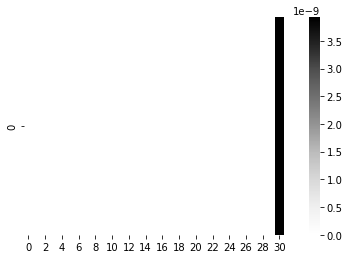

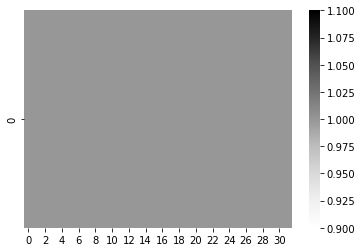

United Kingdom


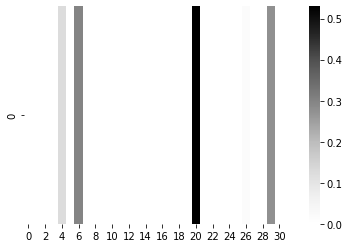

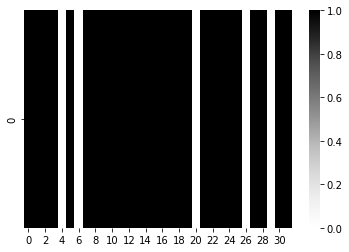

France


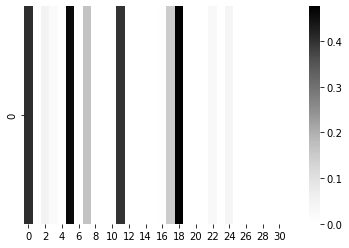

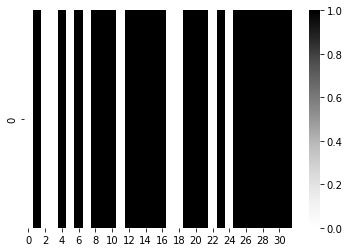

Hong Kong


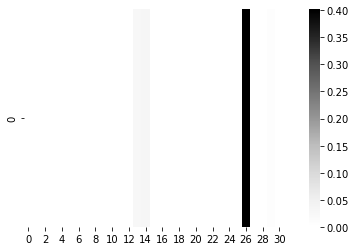

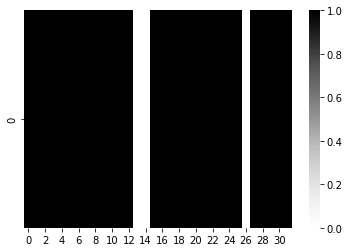

Australia


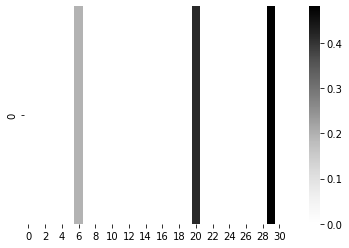

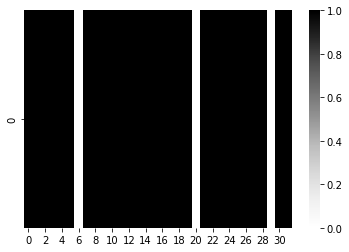

Japan


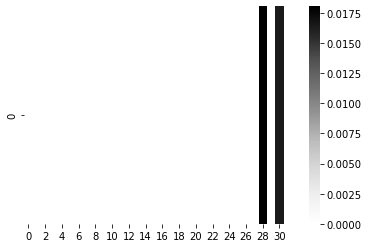

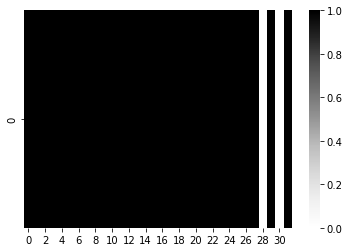

China


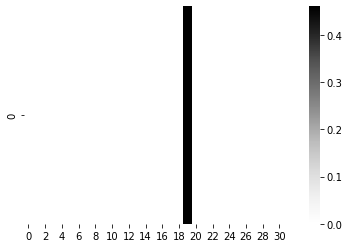

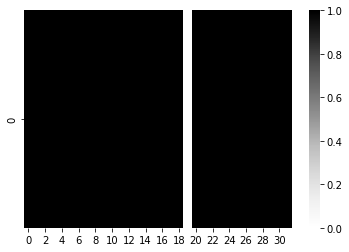

In [28]:
from scipy import stats
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

def find_pv(category):
    actc = get_activation_for_cat(category, df_s)
    actnc = get_activation_for_not_cat(category, df_s)
    reses = []
    for i in range(1000):  
        actncs = actnc.sample(len(actc), replace=True)
        res = []
        for col in actc:
            p = stats.wilcoxon(np.array(actncs[col]), y=np.array(actc[col])).pvalue
            res.append(p)
        reses.append(res)
    return pd.DataFrame(np.array(reses)).mean()

for c, n in get_popular_categories(df):
    print(c)
    r = find_pv(c)
    rdf = pd.DataFrame(r)
    
    sns.heatmap(rdf.T, cmap="Greys")
    plt.show()
    
    """
    data = [go.Heatmap(z=rdf.T, zmin=0, zmax=1,
            colorscale=['rgb(255, 255, 255)', 'rgb(0, 0, 0)'], 
            reversescale=False)]
    layout = go.Layout(template='none', height=300)
    fig = go.Figure(data=data, layout=layout)
    fig.show()
    """
    

    rdf[0] = rdf[0].apply(lambda x: 0 if x > 0.01 else 1)
    
    sns.heatmap(rdf.T, cmap="Greys")
    plt.show()
    
    """
    data = [go.Heatmap(z=rdf.T, zmin=0, zmax=1,
            colorscale=['rgb(0, 0, 0)', 'rgb(255, 255, 255)'], 
            reversescale=False)]
    layout = go.Layout(template='none', height=300)
    fig = go.Figure(data=data, layout=layout)
    fig.show()
    """

In [56]:
def get_heatmaps_dict():
    dheatmaps = {}
    for c, n in get_popular_categories(df_s, thresh=500):
        for_cat = {}

        r = find_pv(c)

        # 1st heatmap
        rdf = pd.DataFrame(r)
        ax = sns.heatmap(rdf.T, cbar=False, cmap="Greys")
        fig = ax.get_figure()
        path = f"../heatmaps/{c}-1.png"
        #fig.savefig(path)

        for_cat['heatmap-1'] = {}
        for_cat['heatmap-1']['path'] = path
        for_cat['heatmap-1']['data'] = np.array(rdf[0]).T

        # 2st heatmap
        rdf[0] = rdf[0].apply(lambda x: 0 if x > 0.01 else 1)
        ax = sns.heatmap(rdf.T, cbar=False, cmap="Greys")
        fig = ax.get_figure()
        path = f"../heatmaps/{c}-2.png"
        #fig.savefig(path)

        for_cat['heatmap-2'] = {}
        for_cat['heatmap-2']['path'] = path
        for_cat['heatmap-2']['data'] = np.array(rdf[0]).T

        # Add paths to dict
        dheatmaps[c] = for_cat

    return dheatmaps

In [57]:
np.array(rdf[0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

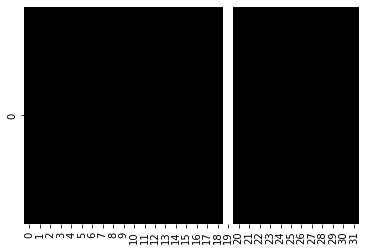

In [58]:
h = get_heatmaps_dict()

In [59]:
h

{'United States': {'heatmap-1': {'path': '../heatmaps/United States-1.png',
   'data': array([1.46198609e-076, 1.71638847e-051, 2.03544138e-046, 2.20058136e-100,
          2.94860797e-017, 2.30586278e-028, 1.23368558e-051, 3.69283375e-079,
          2.96517976e-117, 6.74798750e-067, 5.45418039e-043, 2.16964572e-048,
          2.25993067e-082, 2.45105790e-048, 2.25343390e-037, 2.95485360e-038,
          2.55777403e-077, 2.47333562e-079, 1.96340352e-106, 1.21417855e-096,
          9.78662121e-035, 7.17925972e-106, 1.05600221e-055, 3.68784045e-098,
          1.08879397e-082, 3.36809681e-137, 9.37311202e-039, 4.77797891e-105,
          3.63012427e-039, 8.32582574e-023, 1.86907083e-009, 2.29922421e-048])},
  'heatmap-2': {'path': '../heatmaps/United States-2.png',
   'data': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)}},
 'United Kingdom': {'heatmap-1': {'path': '../heatmaps/United Kingdom-1.png',
   'data': 

In [67]:
data.reshape(-1, 1).shape

(32, 1)

[1.46198609e-076 1.71638847e-051 2.03544138e-046 2.20058136e-100
 2.94860797e-017 2.30586278e-028 1.23368558e-051 3.69283375e-079
 2.96517976e-117 6.74798750e-067 5.45418039e-043 2.16964572e-048
 2.25993067e-082 2.45105790e-048 2.25343390e-037 2.95485360e-038
 2.55777403e-077 2.47333562e-079 1.96340352e-106 1.21417855e-096
 9.78662121e-035 7.17925972e-106 1.05600221e-055 3.68784045e-098
 1.08879397e-082 3.36809681e-137 9.37311202e-039 4.77797891e-105
 3.63012427e-039 8.32582574e-023 1.86907083e-009 2.29922421e-048]


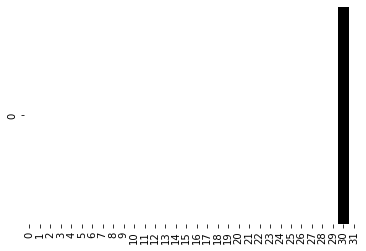

[2.74780162e-09 8.10948777e-06 1.15256744e-06 6.13071412e-08
 1.23999356e-01 1.92054001e-07 3.02801033e-01 1.80729474e-08
 4.27882592e-07 9.47071078e-05 2.73470643e-04 8.00419960e-09
 9.90664765e-06 2.56193960e-03 1.60078184e-03 8.07665602e-04
 4.53268684e-07 1.87485611e-08 3.61072771e-10 6.78746851e-09
 5.26728926e-01 2.07712802e-05 8.51793611e-07 2.21446277e-06
 1.67894771e-07 7.34658224e-06 1.73909522e-02 4.51682307e-06
 4.36368583e-09 2.78244048e-01 4.58857306e-05 4.49284034e-12]


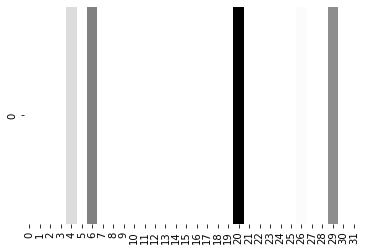

[3.76323512e-01 6.15623352e-03 5.85123354e-02 2.70473123e-02
 1.92251887e-14 4.71912686e-01 2.28936079e-13 1.92311731e-01
 2.82757656e-03 1.22036485e-04 1.95932753e-03 4.18956964e-01
 3.87516342e-04 1.59188205e-05 7.19979750e-05 1.14347490e-04
 5.76249747e-03 1.71907287e-01 4.98318174e-01 2.78300059e-03
 4.81373251e-19 4.38495768e-07 3.59042558e-02 2.67421780e-03
 4.71264493e-02 1.75947609e-05 2.21091437e-07 1.34404570e-04
 9.31065252e-10 9.34291367e-10 2.52892759e-12 5.07782515e-04]


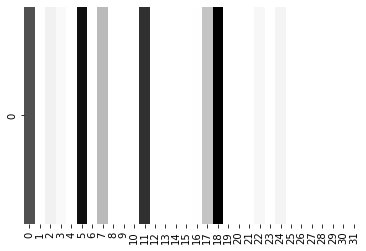

[5.38729220e-29 4.23764070e-10 1.77277756e-16 4.65701614e-17
 5.27570943e-17 3.24884172e-18 3.56292574e-04 1.13357715e-23
 2.14697244e-12 4.02786218e-05 8.64902542e-05 3.98375964e-28
 3.45881409e-06 2.66230077e-02 3.00307073e-02 1.67917486e-05
 1.19009923e-12 1.61401721e-24 9.84107313e-33 4.88413127e-26
 2.12795000e-04 3.83621958e-06 1.49501122e-15 3.11942152e-13
 1.79640171e-13 6.06308002e-08 3.98850220e-01 1.15901927e-09
 4.62245309e-38 8.05048514e-03 1.21630020e-41 1.07719996e-51]


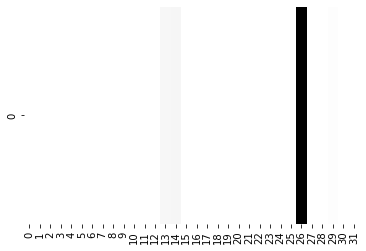

[2.82334723e-43 2.46666372e-26 5.47194852e-30 1.83752494e-40
 9.93728915e-04 1.95049742e-31 1.77947926e-01 9.27060086e-41
 2.02765730e-39 2.16907966e-23 3.67572064e-18 5.30202260e-40
 3.86842432e-28 6.29697237e-11 6.73403809e-11 1.37817402e-13
 4.52218258e-34 7.96696616e-40 1.03463892e-45 7.52798835e-42
 4.07295924e-01 3.35487967e-27 1.05255647e-32 6.66341055e-35
 2.85197605e-38 6.79085118e-36 2.25090528e-05 2.73901315e-33
 1.04775015e-50 4.89148132e-01 7.89101642e-19 1.50841058e-50]


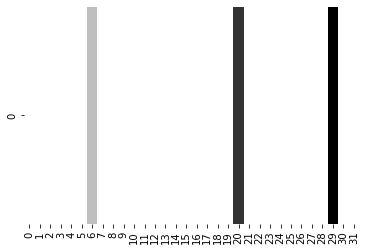

[3.48398193e-34 5.91559509e-37 4.34001595e-40 3.44113599e-34
 3.49831813e-15 6.07636703e-43 8.34426892e-21 2.72086550e-37
 3.06245295e-32 2.97039147e-29 3.45856351e-32 2.70548574e-39
 2.09023079e-26 7.25589945e-30 3.75860436e-32 5.67929502e-35
 7.04632858e-34 5.95994841e-37 9.04918793e-30 2.59096323e-07
 1.72149679e-19 5.63198745e-26 7.82993528e-39 1.48111376e-30
 7.63890395e-35 1.04291643e-22 1.18740908e-25 3.93545707e-29
 2.21473270e-02 1.58920210e-25 1.77160452e-02 1.95787522e-15]


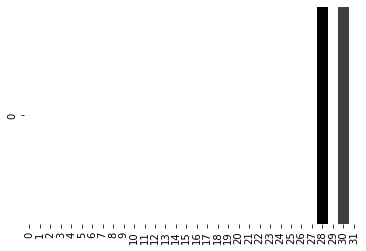

[1.94088783e-21 4.85024029e-22 1.13854460e-25 7.45410543e-16
 1.73780904e-04 4.43488495e-33 4.81952848e-07 9.21818796e-22
 1.28452483e-13 1.09687306e-15 2.59624171e-18 1.22489157e-27
 1.87506102e-11 2.96785237e-14 7.31489816e-17 1.83663620e-19
 2.73070336e-18 6.09686887e-21 1.88811033e-19 4.39311928e-01
 6.47584057e-07 6.13176128e-10 9.65446711e-24 2.04215016e-13
 3.55258650e-22 3.45465927e-09 2.33095870e-10 2.85606054e-13
 2.90429486e-04 8.42312948e-10 5.71453561e-08 4.14562567e-16]


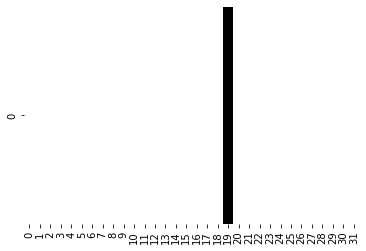

In [70]:
for k in h:
    data = h[k]['heatmap-1']['data']
    print(data)
    sns.heatmap(data.reshape(-1, 1).T, cbar=False, cmap="Greys")
    plt.show()

In [71]:
get_popular_categories(df_s)

[('United States', 10734),
 ('United Kingdom', 1757),
 ('France', 1725),
 ('Hong Kong', 804),
 ('Australia', 592),
 ('Japan', 580),
 ('China', 567)]